Section 1

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
# 1. Remove duplicate rows
df = pd.read_csv("employee_data.csv")
data = df.copy()
data = data.drop_duplicates()

# 2. Convert Age to int after filling missing values
data["Age"] = data["Age"].fillna(data["Age"].median()).astype(int)

# 3. Remove outliers from Salary using IQR
Q1 = data["Salary"].quantile(0.25)
Q3 = data["Salary"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Remove salary outliers above upper bound
data = data[data["Salary"] <= upper_bound]


# 4. Standardize text to lowercase
data["Name"] = data["Name"].str.lower()

# 5. Remove invalid ages
data = data[(data["Age"] >= 18) & (data["Age"] <= 70)]  # employees must be between 18 and 70 years old

Section 2

In [36]:
# 6. Count missing values
print(data.isnull().sum())

# 7. Remove rows with missing values
data_no_missing = data.dropna()

# 8. Impute missing Salary with mean
data["Salary"] = data["Salary"].fillna(data["Salary"].mean())

# 9. Impute Gender with mode
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])

# 10. Forward fill
data_ffill = data.fillna(method='ffill')

EmployeeID     0
Name           0
Age            0
Salary         0
Department     0
JoiningDate    0
Experience     0
Gender         0
dtype: int64


C:\Users\sasha\AppData\Local\Temp\ipykernel_20592\2629122631.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill = data.fillna(method='ffill')


Section 3

In [37]:
# 11. Min-Max Normalization on Salary
#This scales all salary values so they fall between 0 and 1 using the formula:
#(value - min) / (max - min).
scaler = MinMaxScaler()
data["Salary_MinMax"] = scaler.fit_transform(data[["Salary"]])

# 12. Z-score Standardization on Experience
#This standardizes the Experience column to have a mean of 0 and a standard deviation of 1.
data["Experience_Standardized"] = StandardScaler().fit_transform(data[["Experience"]])

# 13. Log transformation
# This applies the log(x + 1) function to reduce the effect of very large salary values.
data["Salary_Log"] = np.log1p(data["Salary"])

# 14. Square root transformation
# This takes the square root of each experience value to gently compress the range.
data["Experience_Sqrt"] = np.sqrt(data["Experience"])

# 15. Box-Cox transformation on Age
#This automatically finds the best power to transform the Age column to look more like a normal distribution.
# Box-Cox requires all values to be positive, so ensure Age is positive.
data["Age_BoxCox"], _ = stats.boxcox(data["Age"])

Section 4 

        EmployeeID      Name        Age        Salary Department JoiningDate  \
count     8.000000         8   8.000000      8.000000          8           8   
unique         NaN         8        NaN           NaN          4           8   
top            NaN  john doe        NaN           NaN         HR  2018-06-20   
freq           NaN         1        NaN           NaN          3           1   
mean    105.125000       NaN  33.750000  58750.000000        NaN         NaN   
std       2.900123       NaN   7.629829   8779.033465        NaN         NaN   
min     101.000000       NaN  26.000000  48000.000000        NaN         NaN   
25%     102.750000       NaN  29.000000  53750.000000        NaN         NaN   
50%     105.500000       NaN  31.500000  56500.000000        NaN         NaN   
75%     107.250000       NaN  35.250000  63750.000000        NaN         NaN   
max     109.000000       NaN  50.000000  73000.000000        NaN         NaN   

        Experience Gender  Salary_MinMa

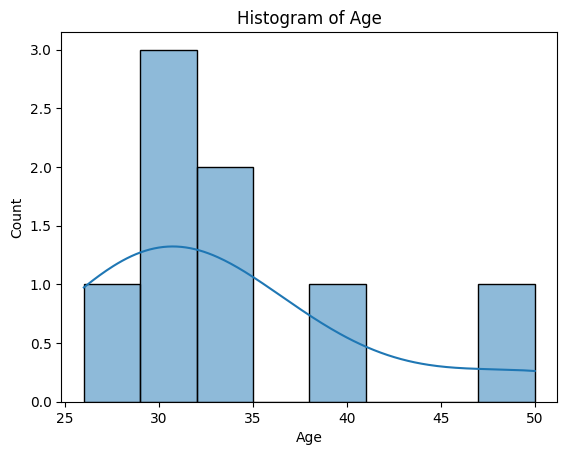

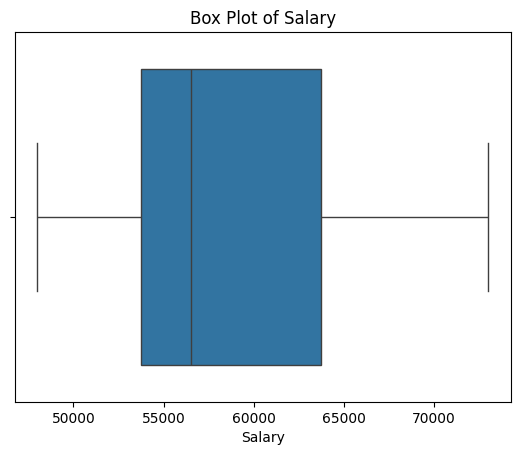

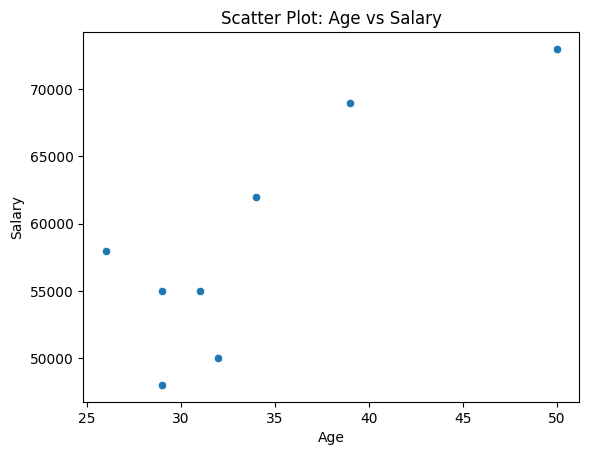

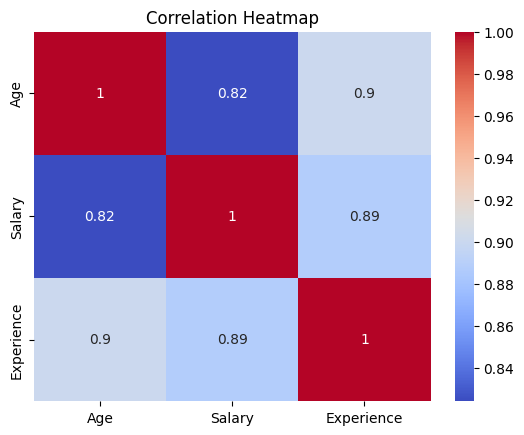

In [38]:
# 16. Summary statistics
print(data.describe(include='all'))

# 17. Histogram of Age
sns.histplot(data["Age"], bins=8, kde=True)
plt.title("Histogram of Age")
plt.show()

# 18. Box plot of Salary
sns.boxplot(x=data["Salary"])
plt.title("Box Plot of Salary")
plt.show()

# 19. Scatter plot between Age and Salary
sns.scatterplot(x="Age", y="Salary", data=data)
plt.title("Scatter Plot: Age vs Salary")
plt.show()

# 20. Heatmap of correlation
sns.heatmap(data[["Age", "Salary", "Experience"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()